**UNIVERSIDADE DE SÃO PAULO (USP)**

**_Author_**: Carlos Filipe de Castro Lemos

**_Academic Study_**: Generic Data Transformation

* Analyze table structure:
  * Check redundant columns.
  * Check derived columns.
  * Remove empty columns.
  * Remove duplicate lines.

* Analyze data values:
  - Observe business rules
  - Missing: removal or filling of the line.
  - Null: standardize or discard lines.
  - Check limits: useful for data consistency, such as age (less than zero or greater than 120), absurd dates (February 30), indices (which vary between 0 and 1, but present values ​​outside the range), etc.

# Packages

In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

This dataset is used to credit analysis. I don´t know the origin. So if you know, tell me to put in here.

In [385]:
df = pd.read_csv("./data/Churn.csv", sep=';')

# Looking at Data

In [386]:
# Checking dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      999 non-null    int64  
 1   X1      999 non-null    int64  
 2   X2      999 non-null    object 
 3   X3      991 non-null    object 
 4   X4      999 non-null    int64  
 5   X4.1    999 non-null    int64  
 6   X6      999 non-null    int64  
 7   X7      999 non-null    int64  
 8   X8      999 non-null    int64  
 9   X9      999 non-null    int64  
 10  X10     992 non-null    float64
 11  X11     999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [387]:
# Checking duplicated
df.duplicated().sum()

1

In [388]:
# Checking NaN values
df.isnull().sum()

X0      0
X1      0
X2      0
X3      8
X4      0
X4.1    0
X6      0
X7      0
X8      0
X9      0
X10     7
X11     0
dtype: int64

# Preparing the Data

## Looking at the Data Structure

In [389]:
# Change columns name
df.columns = [
    'id', 'score','state','gender','age',
    'patrimony','balance','products','credit',
    'active','wage','leave'
]

In [390]:
# Drop duplicated lines
df = df.drop_duplicates()
df.duplicated().sum()

0

There is no empty, redundant or derived columns, as well there is no duplicated lines. However, the company has a business rule that says it will only operate in the states of PR, SC and RS. Let see if the data is correct.

## Looking at the Data Values

### NULL Values

In [391]:
df.isnull().sum()

id           0
score        0
state        0
gender       8
age          0
patrimony    0
balance      0
products     0
credit       0
active       0
wage         7
leave        0
dtype: int64

Ok. We have trouble in gender and wage. We need to fix this at the right time.

### State

In [392]:
# Looking at the business rule
df.groupby(['state']).size()

state
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='state', ylabel='Count'>

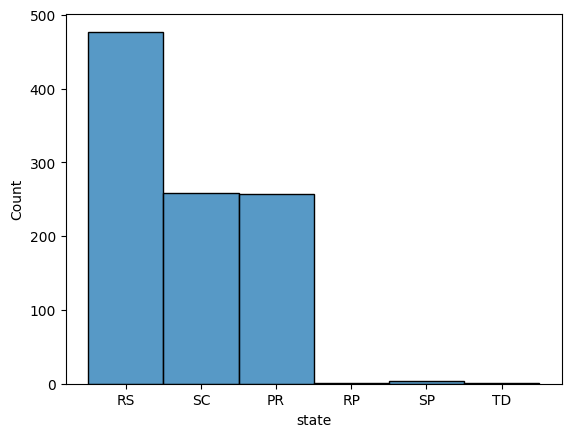

In [393]:
sns.histplot(df, x='state')

We have some problem, because RP, SP and TD. We are going to change this values to the mode (RS).

In [394]:
# Changing values
df.loc[df['state'].isin(['SP', 'RP', 'TD']), 'state'] = 'RS'

# Looking at the business rule
df.groupby(['state']).size()

state
PR    257
RS    483
SC    258
dtype: int64

### Gender

In [395]:
# Looking at gender variable
df.groupby(['gender']).size()

gender
F              2
Fem            1
Feminino     460
M              6
Masculino    521
dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

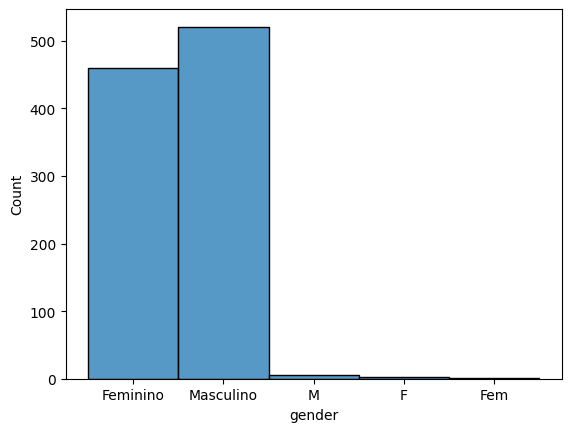

In [396]:
sns.histplot(df, x='gender')

The variable is not standardized. We need to fix this.

In [397]:
df.loc[df['gender'].isin(['F', 'Fem'])]

,id,score,state,gender,age,patrimony,balance,products,credit,active,wage,leave
131,133,795,PR,F,33,9,13086243,1,1,1,11493521.0,0
141,143,663,RS,Fem,34,7,0,2,1,1,18042724.0,0
988,990,659,SC,F,31,7,14962088,2,1,1,10453351.0,0


In [398]:
df.loc[df['gender'].isin(['M', 'RS'])]

,id,score,state,gender,age,patrimony,balance,products,credit,active,wage,leave
6,7,822,RS,M,50,7,0,2,1,1,100628.0,0
15,16,616,PR,M,45,3,14312941,2,0,1,6432726.0,0
20,21,732,RS,M,41,8,0,2,1,1,17088617.0,0
119,121,699,PR,M,34,4,18517381,2,1,0,12083448.0,0
958,960,531,SC,M,27,8,13257625,1,0,0,722292.0,0
973,975,750,SC,M,38,7,9725741,2,0,1,17988304.0,0


In [399]:
df.loc[df['gender'].isnull()]

,id,score,state,gender,age,patrimony,balance,products,credit,active,wage,leave
64,65,603,PR,NaN,26,4,10916637,1,1,1,9284067.0,0
84,86,493,RS,NaN,46,4,0,2,1,0,190766.0,0
213,215,676,RS,NaN,34,1,6309501,1,1,1,4064581.0,0
296,298,714,RS,NaN,31,4,12516926,1,1,1,10663689.0,0
370,372,801,SC,NaN,42,4,14194767,1,1,1,1059829.0,0
501,503,692,RS,NaN,54,5,0,2,1,1,8872184.0,0
963,965,529,SC,NaN,63,4,9613411,3,1,0,10873296.0,1
969,971,649,PR,NaN,70,9,11685471,2,0,1,10712579.0,0


In [400]:
# Changing values
df.loc[df['gender'].isin(['F', 'Fem']), 'gender'] = 'Feminino'
df.loc[df['gender'].isin(['M', 'RS']), 'gender'] = 'Masculino'

In [401]:
# Filling NaN values with mode
df['gender'].fillna('Masculino', inplace=True)
df['gender'].isnull().sum()

0

In [402]:
df.loc[[131,141,988,6,15,20,22,28,32,55,75,93,119,958,973,64,84,213,296,370,501,963,969]]

,id,score,state,gender,age,patrimony,balance,products,credit,active,wage,leave
131,133,795,PR,Feminino,33,9,13086243,1,1,1,11493521.0,0
141,143,663,RS,Feminino,34,7,0,2,1,1,18042724.0,0
988,990,659,SC,Feminino,31,7,14962088,2,1,1,10453351.0,0
6,7,822,RS,Masculino,50,7,0,2,1,1,100628.0,0
15,16,616,PR,Masculino,45,3,14312941,2,0,1,6432726.0,0
20,21,732,RS,Masculino,41,8,0,2,1,1,17088617.0,0
22,23,510,RS,Feminino,38,4,0,1,1,0,11891353.0,1
28,29,574,RS,Feminino,43,3,14134943,1,1,1,10018743.0,0
32,33,553,RS,Masculino,41,9,11011254,2,0,0,8189881.0,0
55,56,619,RS,Masculino,43,1,12521192,1,1,1,11341049.0,0


In [403]:
# Looking if everything is good.
df.groupby(['gender']).size()

gender
Feminino     463
Masculino    535
dtype: int64

### Score

In [404]:
print(df['score'].min(), df['score'].max())

376 850


<Axes: xlabel='score', ylabel='Count'>

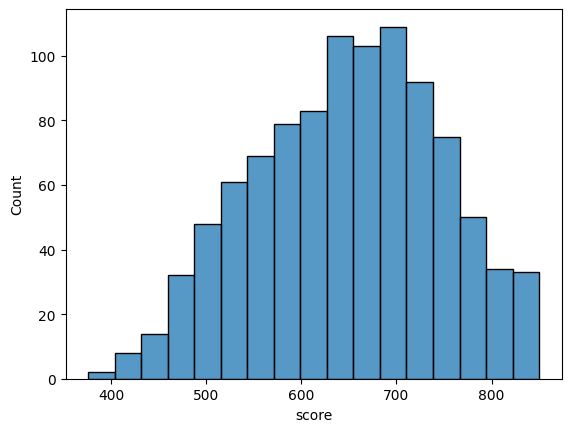

In [405]:
sns.histplot(df, x='score')

### Age

In [406]:
print(df['age'].min(), df['age'].max())

-20 140


Ok. We have a problem, because negative ages or a value of 140 (which is very high) were indicated. Let's see the extent of the problems.

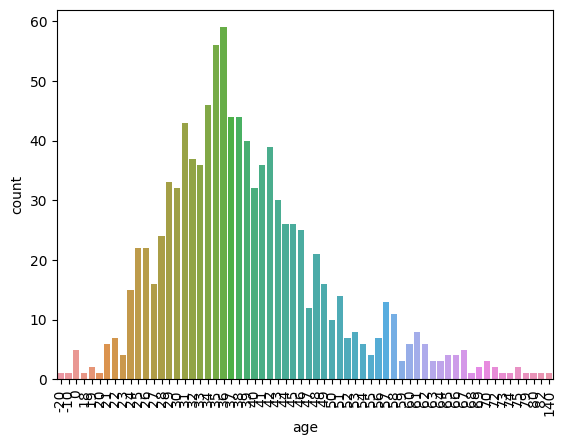

In [407]:
sns.countplot(df, x='age');
plt.xticks(rotation=90);

The data shows us that we have consistent values ​​between 18 and 82 years old. We also see that the distribution has a straight tail. In this case, we cannot use the mean, but we must use the median. Let's do it!

In [408]:
df.loc[(df['age'] < 18) | (df['age'] > 82)]

,id,score,state,gender,age,patrimony,balance,products,credit,active,wage,leave
851,853,667,PR,Feminino,0,1,9713392,2,0,0,11331677.0,1
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
887,889,585,RS,Masculino,0,2,0,2,1,1,1865777.0,0
930,932,661,SC,Masculino,0,6,13262898,1,0,0,3881267.0,0
931,933,564,PR,Masculino,0,9,10352275,2,1,1,3433821.0,0
947,949,715,RS,Feminino,0,5,11859041,1,1,1,568417.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


We must disregard values that are problematic.

In [409]:
age_median = df.loc[~df.index.isin([851,867,887,930,931,947,984,990]), 'age'].median()
age_median

37.0

In [410]:
df.loc[df.index.isin([851,867,887,930,931,947,984,990]), 'age'] = age_median

In [411]:
df.loc[df.index.isin([851,867,887,930,931,947,984,990])]

,id,score,state,gender,age,patrimony,balance,products,credit,active,wage,leave
851,853,667,PR,Feminino,37,1,9713392,2,0,0,11331677.0,1
867,869,636,RS,Feminino,37,1,17083346,1,1,0,11051028.0,1
887,889,585,RS,Masculino,37,2,0,2,1,1,1865777.0,0
930,932,661,SC,Masculino,37,6,13262898,1,0,0,3881267.0,0
931,933,564,PR,Masculino,37,9,10352275,2,1,1,3433821.0,0
947,949,715,RS,Feminino,37,5,11859041,1,1,1,568417.0,1
984,986,773,RS,Masculino,37,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,37,5,93147,2,1,0,6621413.0,0


In [412]:
print(df['age'].min(), df['age'].max())

18 82


### Patrimony

In [413]:
print(df['patrimony'].min(), df['patrimony'].max())

0 10


<Axes: xlabel='patrimony', ylabel='Count'>

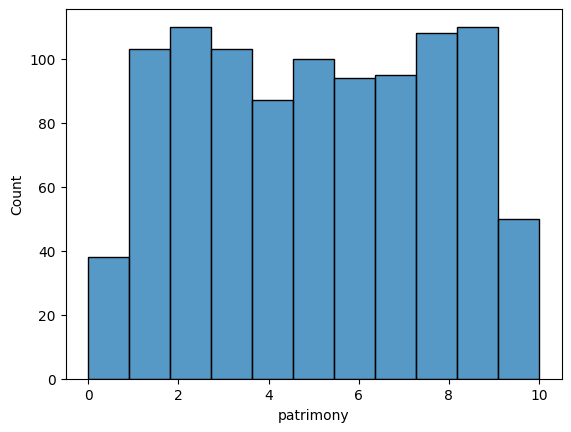

In [414]:
sns.histplot(df, x='patrimony')

### Balance

In [415]:
print(df['balance'].min(), df['balance'].max())

0 21177431


<Axes: xlabel='balance', ylabel='Count'>

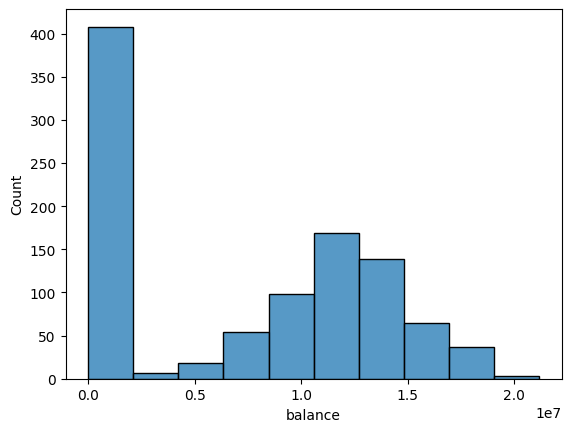

In [416]:
sns.histplot(df, x='balance', bins=10)

### Produtcs

In [417]:
print(df['products'].min(), df['products'].max())

1 4


<Axes: xlabel='products', ylabel='count'>

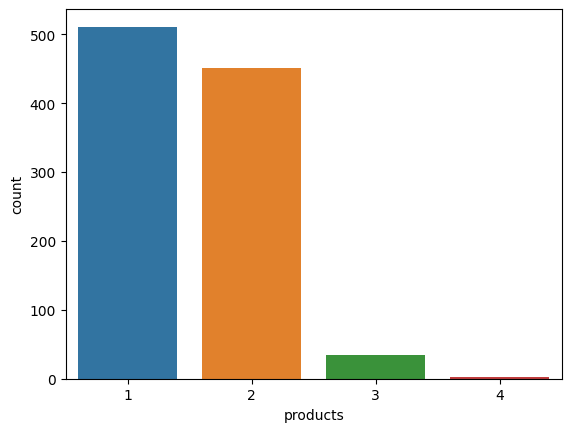

In [418]:
sns.countplot(df, x='products')

### Credit

<Axes: xlabel='credit', ylabel='count'>

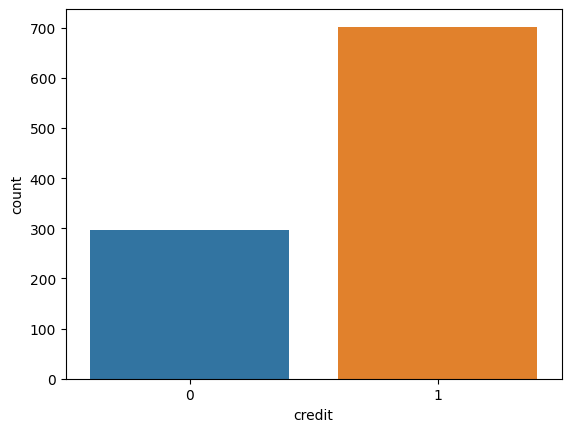

In [419]:
sns.countplot(df, x='credit')

### Active

<Axes: xlabel='active', ylabel='count'>

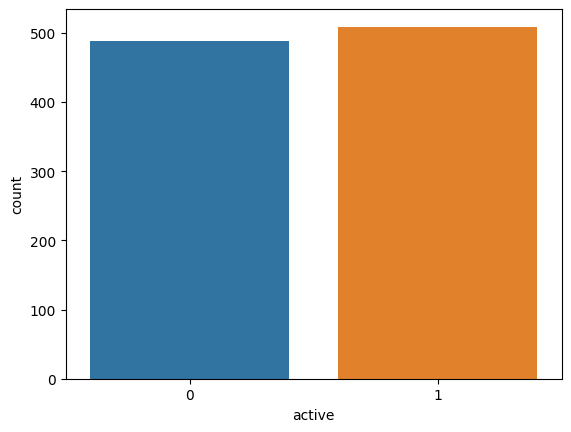

In [420]:
sns.countplot(df, x='active')

### Wage

There are null values. So, we must take care of these kind of trouble.

In [421]:
df.loc[df['wage'].isnull()]

,id,score,state,gender,age,patrimony,balance,products,credit,active,wage,leave
17,18,549,SC,Feminino,24,9,0,2,1,1,NaN,0
52,53,788,RS,Feminino,33,5,0,2,0,0,NaN,0
179,181,754,PR,Feminino,55,3,16160881,1,1,0,NaN,1
330,332,656,RS,Masculino,50,7,0,2,0,1,NaN,0
426,428,492,PR,Masculino,39,10,12457665,2,1,0,NaN,0
550,552,721,PR,Feminino,36,3,6525307,2,1,0,NaN,0
983,985,614,PR,Feminino,35,6,12810028,1,0,0,NaN,1


Let's see how the data is distributed.

<Axes: >

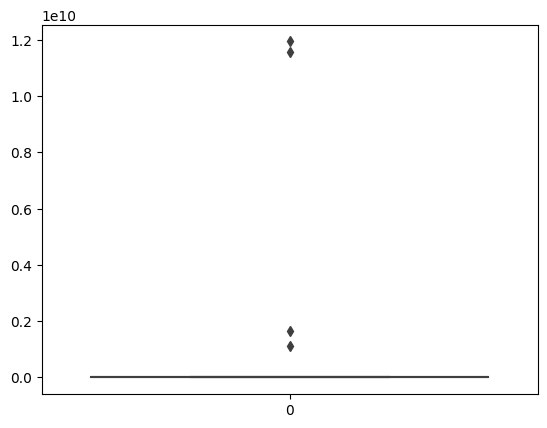

In [422]:
sns.boxplot(df['wage'])

There are outliers. So, we need to use median.

In [423]:
wage_median = df.loc[~df.index.isin([17,52,179,330,426,550,983])]['wage'].median()

In [424]:
df.loc[df.index.isin([17,52,179,330,426,550,983]), 'wage'] = wage_median

In [425]:
df.loc[df.index.isin([17,52,179,330,426,550,983])]

,id,score,state,gender,age,patrimony,balance,products,credit,active,wage,leave
17,18,549,SC,Feminino,24,9,0,2,1,1,8695742.0,0
52,53,788,RS,Feminino,33,5,0,2,0,0,8695742.0,0
179,181,754,PR,Feminino,55,3,16160881,1,1,0,8695742.0,1
330,332,656,RS,Masculino,50,7,0,2,0,1,8695742.0,0
426,428,492,PR,Masculino,39,10,12457665,2,1,0,8695742.0,0
550,552,721,PR,Feminino,36,3,6525307,2,1,0,8695742.0,0
983,985,614,PR,Feminino,35,6,12810028,1,0,0,8695742.0,1


### Leave

<Axes: xlabel='leave', ylabel='count'>

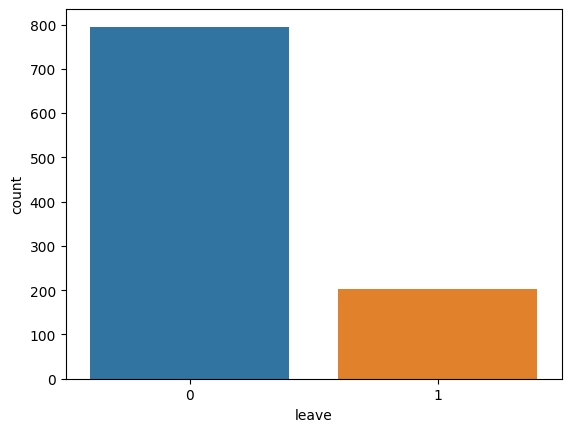

In [426]:
sns.countplot(df, x='leave')

## Final Info

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         998 non-null    int64  
 1   score      998 non-null    int64  
 2   state      998 non-null    object 
 3   gender     998 non-null    object 
 4   age        998 non-null    int64  
 5   patrimony  998 non-null    int64  
 6   balance    998 non-null    int64  
 7   products   998 non-null    int64  
 8   credit     998 non-null    int64  
 9   active     998 non-null    int64  
 10  wage       998 non-null    float64
 11  leave      998 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 133.6+ KB


In [428]:
df.to_csv('./data/03transformed.csv')